In [1]:

import tensorflow as tf
import os

data_folder = '/home/dados229/luciana/BayesianProjects/BayesianChallenge2/deepbayesianstronglensing-master/data/DataChallenge2'

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import numpy as np
from time import time
import matplotlib
from utils._time import ElapsedTime
import keras.backend as K
import warnings
warnings.filterwarnings("ignore")
from astropy.io import fits
from keras.utils import Progbar
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [10]:
data_dir = '/home/dados229/cenpes/DataChallenge2/'
catalog_name = 'image_catalog2.0train_corrigido.csv'

""" Load catalog before images """
import pandas as pd 
catalog = pd.read_csv(os.path.join(data_dir, catalog_name), header = 0) # 28 for old catalog

""" Now load images using catalog's IDs """
from skimage.transform import resize
channels = ['H','J','Y']
#channels = ['VIS']
nsamples = len(catalog['ID'])
idxs2keep = []

reload = False

""" Try to load numpy file with images """
if os.path.isfile(os.path.join(data_dir,'images_hjy.npy')) and not reload:  
    images = np.load(os.path.join(data_dir,'images_hjy.npy'))
    idxs2keep = list(np.load(os.path.join(data_dir,'idxs2keep.npy')))
else:
    images = None
    """ Loop thru indexes """
    pbar = Progbar(nsamples-1)
    for iid,cid in enumerate(catalog['ID']): #enumerate(catalog['ID']):

        """ Loop thru channels"""
        for ich,ch in enumerate(channels):

            """ Init image dir and name """
            image_file = os.path.join(data_dir,
                                      'Train',
                                      'Public',
                                      'EUC_' + ch,
                                      'imageEUC_{}-{}.fits'.format(ch,cid))

            if os.path.isfile(image_file):

                """ Import data with astropy """
                image_data = fits.getdata(image_file, ext=0)
                #image_data = resize(image_data, (100,100))
                
                """ Initialize images array in case we haven't done it yet """
                if images is None:
                    images = np.zeros((nsamples,*image_data.shape,len(channels)))

                """ Set data in array """
                images[iid,:,:,ich] = image_data
                if iid not in idxs2keep: 
                    idxs2keep.append(iid)
            else:
                print('\tSkipping index: {} (ID: {})'.format(iid,cid))
                break


        if iid%100 == 0 and iid != 0:
            pbar.update(iid)

    """ Now save to numpy file """
    np.save(os.path.join(data_dir,'images_hjy.npy'), images)
    np.save(os.path.join(data_dir,'idxs2keep.npy'), np.array(idxs2keep))

99900/99999 [============================>.] - ETA: 1s

PermissionError: [Errno 13] Permission denied: '/home/dados229/cenpes/DataChallenge2/idxs2keep.npy'

In [2]:
data_dir = '/home/dados229/cenpes/DataChallenge2/'
catalog_name = 'image_catalog2.0train_corrigido.csv'

images_vis = np.load(os.path.join(data_dir,'images_vis.npy'))
images_hjy = np.load(os.path.join(data_dir,'images_hjy.npy'))
idxs2keep = list(np.load(os.path.join(data_dir,'idxs2keep.npy')))

In [3]:
import pandas as pd 
catalog = pd.read_csv(os.path.join(data_dir, catalog_name), header = 0) # 28 for old catalog

### Delete invalid indexes

In [4]:
catalog = catalog.loc[idxs2keep]
images_vis = images_vis[idxs2keep]
images_hjy = images_hjy[idxs2keep]

In [5]:
print(images_vis.shape, images_hjy.shape)

(99991, 200, 200, 1)

In [14]:
vis_p_max = np.percentile(images_vis, 98)
vis_p_max

4.623768815742446e-12

In [10]:
vis_p_min = -(np.percentile(-images_vis, 99.9))
vis_p_min

-1.5977605523354033e-12

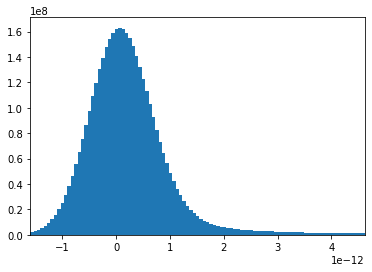

In [11]:
#vis_min = images_vis.min()
#vis_max = images_vis.max()

#print(f"Vis_Min: {vis_min} | Vis_Max: {vis_max}")

plt.hist(images_vis.ravel(), bins=np.linspace(vis_p_min, vis_p_max, 100))
plt.xlim(vis_p_min, vis_p_max)

plt.show()

Vis_Min: 0.0 | Vis_Max: 1.0


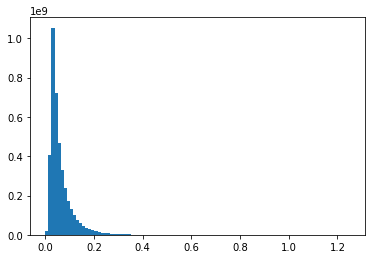

In [5]:
vis_min = images.min()
vis_max = images.max()

print(f"Vis_Min: {vis_min} | Vis_Max: {vis_max}")

plt.hist(images.ravel(), bins=np.linspace(vis_min, vis_max + 0.25, 100))
plt.show()

In [20]:
h_max = images_hjy[:,:,:,0].max()
print(h_max)
h_p_max = np.percentile(images_hjy[:,:,:,0], 98)
h_p_max


4.5825408960809e-06


1.9406750095818282e-10

In [16]:
h_min = images_hjy[:,:,:,0].min()
print(h_min)
h_p_min = -(np.percentile(-images_hjy[:,:,:,0], 99.9))
h_p_min

-4.9064533685916345e-11


-2.4760928082207426e-11

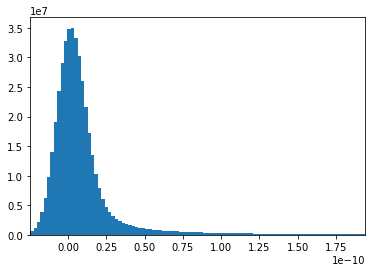

In [21]:
plt.hist(images_hjy[:,:,:,0].ravel(), bins=np.linspace(h_p_min, h_p_max, 100))
plt.xlim(h_p_min, h_p_max)
plt.show()

In [25]:
j_max = images_hjy[:,:,:,1].max()
print(j_max)
j_p_max = np.percentile(images_hjy[:,:,:,1], 98)
j_p_max

3.905488483724184e-06


1.4528640790434366e-10

In [23]:
j_min = images_hjy[:,:,:,1].min()
print(j_min)
j_p_min = -(np.percentile(-images_hjy[:,:,:,1], 99.9))
j_p_min

-6.092311377603465e-11


-2.973456141031121e-11

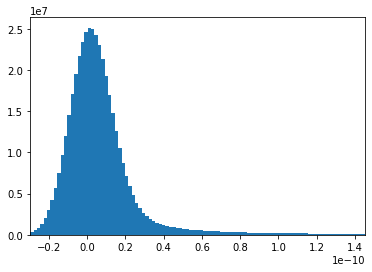

In [26]:
plt.hist(images_hjy[:,:,:,1].ravel(), bins=np.linspace(j_p_min, j_p_max, 100))
plt.xlim(j_p_min, j_p_max)
plt.show()

In [30]:
y_max = images_hjy[:,:,:,2].max()
print(y_max)
y_p_max = np.percentile(images_hjy[:,:,:,2], 98)
y_p_max

3.1875470085651614e-06


1.0428637467474342e-10

In [28]:
y_min = images_hjy[:,:,:,2].min()
print(y_min)
y_p_min = -(np.percentile(-images_hjy[:,:,:,2], 99.9))
y_p_min

-5.288770463240944e-11


-2.6795723626071855e-11

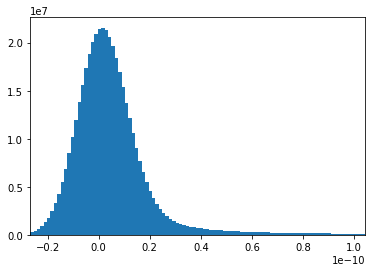

In [31]:
plt.hist(images_hjy[:,:,:,2].ravel(), bins=np.linspace(y_p_min, y_p_max, 100))
plt.xlim(y_p_min, y_p_max)
plt.show()

### Normalize images and apply log

In [32]:
#VIS

images_vis = np.clip(images_vis, vis_p_min, vis_p_max)
images_vis = (images_vis - vis_p_min)/(vis_p_max - vis_p_min)
print(images_vis.min(), images_vis.max())


0.0 1.0


In [33]:
np.save(os.path.join(data_dir,'images_vis_normalized.npy'), images_vis)

In [34]:
#H

images_hjy[:,:,:,0] = np.clip(images_hjy[:,:,:,0], h_p_min, h_p_max)
images_hjy[:,:,:,0] = (images_hjy[:,:,:,0] - h_p_min)/(h_p_max - h_p_min)
print(images_hjy[:,:,:,0].min(), images_hjy[:,:,:,0].max())



0.0 1.0


In [35]:
#J

images_hjy[:,:,:,1] = np.clip(images_hjy[:,:,:,1], j_p_min, j_p_max)
images_hjy[:,:,:,1] = (images_hjy[:,:,:,1] - j_p_min)/(j_p_max - j_p_min)
print(images_hjy[:,:,:,1].min(), images_hjy[:,:,:,1].max())



0.0 1.0


In [36]:
#Y

images_hjy[:,:,:,2] = np.clip(images_hjy[:,:,:,2], y_p_min, y_p_max)
images_hjy[:,:,:,2] = (images_hjy[:,:,:,2] - y_p_min)/(y_p_max - y_p_min)
print(images_hjy[:,:,:,2].min(), images_hjy[:,:,:,2].max())



0.0 1.0


In [37]:
np.save(os.path.join(data_dir,'images_hjy_normalized.npy'), images_hjy)

In [2]:
data_dir = '/home/dados229/cenpes/DataChallenge2/'

images_vis = np.load(os.path.join(data_dir,'images_vis_normalized.npy'))
images_hjy = np.load(os.path.join(data_dir,'images_hjy_normalized.npy'))

In [7]:
del images_hjy

In [11]:
import cv2

resized = []
for i in range(images_vis.shape[0]):
    tmp = cv2.resize(images_vis[i], (66,66))
    tmp = tmp.reshape(66,66,1)
    
    
    resized.append(tmp)
    
    """
    if i == 0:
        resized = tmp
    else:
        resized = np.concatenate([resized,tmp], axis=0)
    """
resized = np.stack(resized, axis=0)
resized.shape

(99991, 66, 66, 1)

In [12]:
del images_vis


In [13]:
images_hjy = np.load(os.path.join(data_dir,'images_hjy_normalized.npy'))

all_in = np.concatenate([images_hjy, resized], axis=-1)
all_in.shape

(99991, 66, 66, 4)

In [14]:
np.save(os.path.join(data_dir,'images_all_in.npy'), all_in)

### Build is_lens condition

In [7]:
is_lens = (catalog['n_source_im'] > 0) & (catalog['mag_eff'] > 1.6) & (catalog['n_pix_source'] > 20)
print(is_lens[:3])# 700
is_lens = 1.0*is_lens
from keras.utils import to_categorical
is_lens = to_categorical(is_lens, 2)

0     True
1     True
2    False
dtype: bool


In [8]:
is_lens[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)